## PCA paso-a-paso sobre Iris (NumPy) + Plotly 3D + Seaborn scatter de PC1 vs PC2

### Explicación paso a paso (matemática y correspondencia con el código)
1.	Elegir las columnas: usamos `petal_length` y `petal_width` (informativas) + noise (aleatoria).
2.	Media: $\mu = \frac{1}{n}\sum_{i=1}^n x_i$. En el código: `mean_vec = np.mean(X, axis=0)`.
3.	Centrado: $X_c = X - \mu$. En el código: `X_centered = X - mean_vec`.
4.	Matriz de covarianza: $C = \frac{1}{n-1} X_c^\top X_c$. En el código: `cov_matrix = (X_centered.T @ X_centered) / (n - 1)`.
5.	Autovalores/Autovectores: resolver $C v = \lambda v$. En el código: `eigvals, eigvecs = np.linalg.eigh(cov_matrix)`.
•	Ordenás autovalores de mayor a menor porque queremos los componentes que explican más varianza primero.
6.	Varianza explicada: $\text{ratio}_k = \frac{\lambda_k}{\sum_j \lambda_j}$. En el código: `explained_variance_ratio`.
7.	Proyección (scores): $Z = X_c V$, donde $V$ es la matriz cuyas columnas son los autovectores ordenados. En el código: `scores = X_centered @ eigvecs_sorted`.
`scores[:,0]` es la coordenada sobre $PC1$, `scores[:,1]` sobre $PC2$.
8.	Interpretación de cargas: cada componente principal es combinación lineal de las variables originales; los valores en `eigvecs_sorted[:,k]` (autovectores) son las cargas o pesos de cada variable en el componente k. Valores absolutos grandes significan mayor contribución.

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
np.random.seed(42)

import pandas as pd

### 1. Cargar dataset iris

In [ ]:
iris = load_iris()
X_full = iris.data

feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

df = pd.DataFrame(X_full, columns=feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

### 2. Construir variables:

In [ ]:
# -----------------------
#    - dos informativas: petal_length, petal_width
#    - una no informativa: noise (aleatoria)
# -----------------------
# Generar ruido con varianza mucho menor
noise_std = df['petal_length'].std() * 0.005
df['noise'] = np.random.normal(loc=0.0, scale=noise_std, size=len(df))

In [ ]:
# Opcional: visualizar primeras filas
print(df[['petal_length','petal_width','noise','species']].head())

   petal_length  petal_width     noise species
0           1.4          0.2  0.004384  setosa
1           1.4          0.2 -0.001220  setosa
2           1.3          0.2  0.005717  setosa
3           1.5          0.2  0.013443  setosa
4           1.4          0.2 -0.002067  setosa


### 3. Plotly 3D (interactivo)

In [ ]:
fig3d = px.scatter_3d(
    df,
    x='petal_length',
    y='petal_width',
    z='noise',
    #color='species',
    title='Iris: petal_length, petal_width (informativas) y noise (no informativa)',
    labels={'petal_length':'petal_length','petal_width':'petal_width','noise':'noise'}
)

In [ ]:
fig3d.update_traces(marker=dict(size=4))
# Muestra interactiva (en notebook/Colab esto abre el viewer)
fig3d.show()

Varianza individual (diagonal de la matriz de covarianza).

Si la varianza de noise << (varianza de petal_width o varianza petal_length), entonces noise aportará menos peso en los componentes.

In [ ]:
print("Varianzas individuales:")
print(np.var(df[['petal_length','petal_width','noise']], axis=0, ddof=1))

Varianzas individuales:
petal_length    3.116278
petal_width     0.581006
noise           0.000069
dtype: float64


### 4. PCA paso a paso con NumPy

#### Matriz de datos solo con las 3 columnas que analizamos

In [ ]:
X = df[['petal_length','petal_width','noise']].values  # shape (n_samples, n_features)
n, p = X.shape

#### 4.1 Media (vector con medias para cada columna)

In [ ]:
mean_vec = np.mean(X, axis=0)

#### 4.2 Centrar datos utilizando la media de cada columna

In [ ]:
X_centered = X - mean_vec

#### 4.3 Matriz de covarianza (método: (X^T X)/(n-1) => cov muestral)

In [ ]:
cov_matrix = (X_centered.T @ X_centered) / (n - 1)

#### 4.4 Descomposición en autovalores/autovectores (simétrica => eigh)

In [ ]:
eigvals, eigvecs = np.linalg.eigh(cov_matrix)  # devuelve en orden ascendente

#### 4.5 Ordenar autovalores y autovectores en orden descendente (mayor varianza primero)

In [ ]:
idx_desc = np.argsort(eigvals)[::-1]
eigvals_sorted = eigvals[idx_desc]
eigvecs_sorted = eigvecs[:, idx_desc]

#### 4.6 Varianza explicada (ratio)

In [ ]:
explained_variance_ratio = eigvals_sorted / eigvals_sorted.sum()

#### 4.7 Proyección (scores) sobre los componentes principales

In [ ]:
scores = X_centered @ eigvecs_sorted  # cada columna = coordenadas en un PC

Resultados PCA, paso a paso

In [ ]:
# Imprimir resultados intermedios (redondeados para lectura)
np.set_printoptions(precision=6, suppress=True)
print("Media (vector):", mean_vec)
print("\nMatriz de covarianza (3x3):\n", cov_matrix)
print("\nAutovalores (orden descendente):\n", eigvals_sorted)
print("\nVarianza explicada (ratio):\n", explained_variance_ratio)
print("\nAutovectores (columnas = vectores propios, ordenados):\n", eigvecs_sorted)

Media (vector): [ 3.758     1.199333 -0.000727]

Matriz de covarianza (3x3):
 [[3.116278 1.295609 0.00162 ]
 [1.295609 0.581006 0.000619]
 [0.00162  0.000619 0.000069]]

Autovalores (orden descendente):
 [3.661239 0.036046 0.000068]

Varianza explicada (ratio):
 [0.990232 0.009749 0.000018]

Autovectores (columnas = vectores propios, ordenados):
 [[-0.921778 -0.387718 -0.001059]
 [-0.387719  0.921777  0.001297]
 [-0.000474 -0.001606  0.999999]]


#### 4.8 Aporte (loadings) de cada columna sobre los componentes principales

In [ ]:
for i, var in enumerate(['petal_length','petal_width','noise']):
    print(f"{var}: PC1={eigvecs_sorted[i,0]:.3f}, PC2={eigvecs_sorted[i,1]:.3f}")

petal_length: PC1=-0.922, PC2=-0.388
petal_width: PC1=-0.388, PC2=0.922
noise: PC1=-0.000, PC2=-0.002


### 5. Scatterplot con Seaborn: proyección sobre los 2 primeros PCs

En PCA, los vectores propios indican solo direcciones de máxima varianza en el espacio original y, al estar normalizados a longitud 1, no representan magnitud; en cambio, los valores propios asociados expresan cuánta varianza de los datos se concentra en cada dirección, de modo que, al proyectar los datos sobre esos ejes (componentes principales), la dispersión observada en cada uno —el “tamaño” de la nube de puntos a lo largo de esa dirección— está directamente dada por el valor propio.

#### 5.1 Proyección de vectores propios resultantes de PCA sonre datos originales (ya cargados en df)

In [ ]:
# Media de los datos originales (necesaria para anclar los vectores en el centro)
mean_vec = df[['petal_length','petal_width','noise']].mean().values

# Vectores propios (ya calculados con NumPy)
# eigvecs_sorted -> matriz de autovectores ordenados
pc1_vec = eigvecs_sorted[:, 0]   # primer componente
pc2_vec = eigvecs_sorted[:, 1]   # segundo componente

# Escalar los vectores para visualizarlos mejor en el espacio original
scale = 2.5  # puedes ajustar este valor
pc1_line = np.array([mean_vec, mean_vec + scale*pc1_vec])
pc2_line = np.array([mean_vec, mean_vec + scale*pc2_vec])

# -----------------------------------------
# Gráfico 3D con Plotly
# -----------------------------------------
fig3d = px.scatter_3d(
    df,
    x='petal_length',
    y='petal_width',
    z='noise',
    #color='species',
    title='Iris: variables originales + vectores principales'
)

# Agregar vector PC1
fig3d.add_trace(go.Scatter3d(
    x=pc1_line[:,0], y=pc1_line[:,1], z=pc1_line[:,2],
    mode='lines+markers',
    line=dict(color='red', width=8),
    marker=dict(size=5, color='red'),
    name="PC1"
))

# Agregar vector PC2
fig3d.add_trace(go.Scatter3d(
    x=pc2_line[:,0], y=pc2_line[:,1], z=pc2_line[:,2],
    mode='lines+markers',
    line=dict(color='blue', width=8),
    marker=dict(size=5, color='blue'),
    name="PC2"
))

fig3d.show()

#### 5.2 Proyección de datos sobre los 2 primeros componentes principales

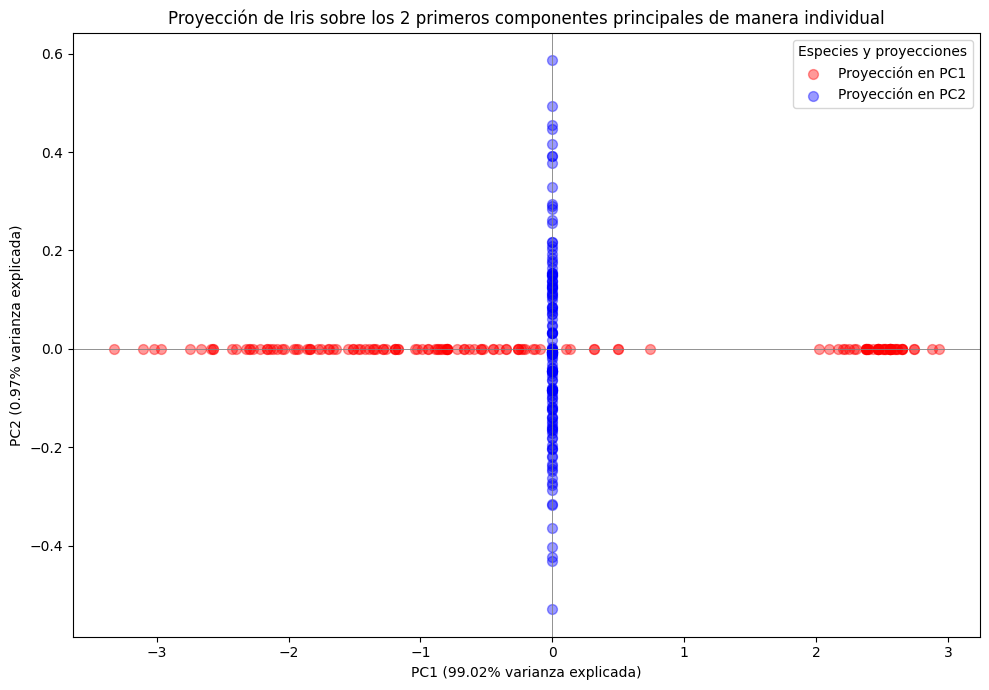

In [ ]:
pc1 = scores[:, 0]
pc2 = scores[:, 1]

plt.figure(figsize=(10, 7))

# Proyección sobre el eje PC1 (en rojo, sobre y=0)
plt.scatter(pc1, [0]*len(pc1),
            s=50, color="red", alpha=0.4, label="Proyección en PC1")

# Proyección sobre el eje PC2 (en azul, sobre x=0)
plt.scatter([0]*len(pc2), pc2,
            s=50, color="blue", alpha=0.4, label="Proyección en PC2")

# Etiquetas y título
plt.xlabel(f'PC1 ({explained_variance_ratio[0]*100:.2f}% varianza explicada)')
plt.ylabel(f'PC2 ({explained_variance_ratio[1]*100:.2f}% varianza explicada)')
plt.title('Proyección de Iris sobre los 2 primeros componentes principales de manera individual')

# Ejes de referencia
plt.axhline(0, color='gray', linewidth=0.6)
plt.axvline(0, color='gray', linewidth=0.6)

# Leyenda
plt.legend(title='Especies y proyecciones', loc='best')
plt.tight_layout()
plt.show()

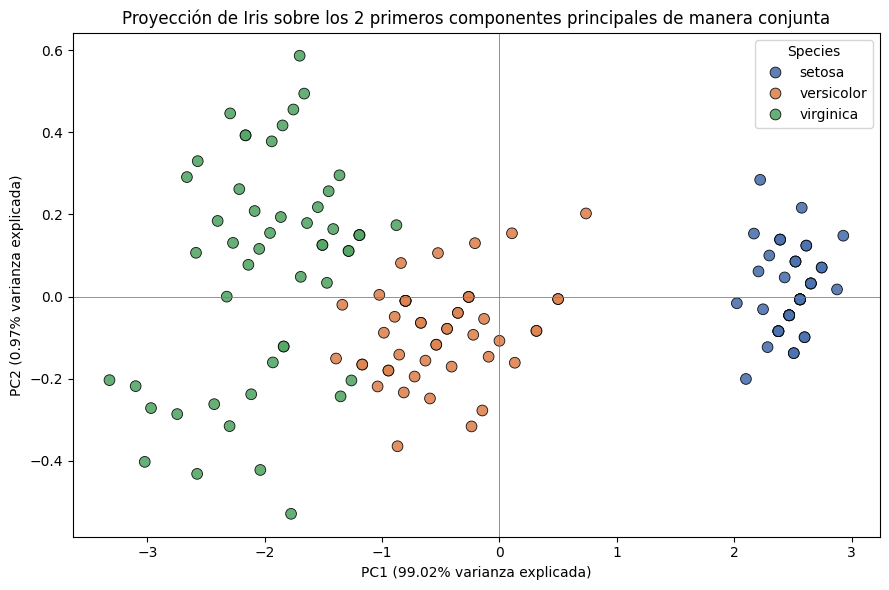

In [ ]:
pc1 = scores[:, 0]
pc2 = scores[:, 1]

plt.figure(figsize=(9,6))
sns.scatterplot(x=pc1, y=pc2, hue=df['species'], palette='deep', s=60, edgecolor='k', alpha=0.9)
plt.xlabel(f'PC1 ({explained_variance_ratio[0]*100:.2f}% varianza explicada)')
plt.ylabel(f'PC2 ({explained_variance_ratio[1]*100:.2f}% varianza explicada)')
plt.title('Proyección de Iris sobre los 2 primeros componentes principales de manera conjunta')
plt.axhline(0, color='gray', linewidth=0.6)
plt.axvline(0, color='gray', linewidth=0.6)
plt.legend(title='Species')
plt.tight_layout()
plt.show()

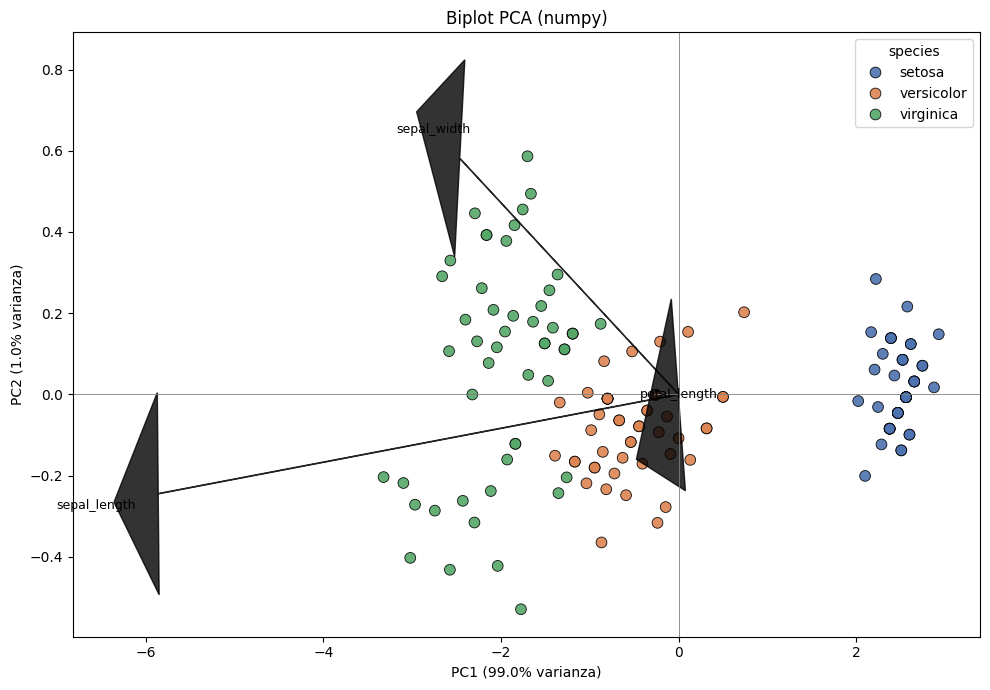

In [ ]:
loadings = eigvecs_sorted * np.sqrt(eigvals_sorted)
scale_factor = np.max(np.abs(scores))
loadings_plot = loadings * scale_factor
loadings_plot_2d = loadings_plot[:, :2]  # solo PC1 y PC2
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Selecciona solo las filas que existen en loadings_plot_2d
num_features = loadings_plot_2d.shape[0]
features_to_plot = numeric_cols[:num_features]

plt.figure(figsize=(10, 7))
sns.scatterplot(x=pc1, y=pc2, hue=df['species'], palette='deep', s=60, edgecolor='k', alpha=0.9)

for i, feature in enumerate(features_to_plot):
    plt.arrow(0, 0,
              loadings_plot_2d[i, 0], loadings_plot_2d[i, 1],
              color='black', alpha=0.8,
              head_width=0.15*scale_factor, head_length=0.15*scale_factor)
    plt.text(loadings_plot_2d[i, 0]*1.12, loadings_plot_2d[i, 1]*1.12,
             feature, color='black', ha='center', va='center', fontsize=9)

plt.xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}% varianza)')
plt.ylabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}% varianza)')
plt.title('Biplot PCA (numpy)')
plt.axhline(0, color='gray', linewidth=0.6)
plt.axvline(0, color='gray', linewidth=0.6)
plt.legend(title='species', loc='best')
plt.tight_layout()
plt.show()

Las flechas (loadings)
Cada flecha representa una variable original del dataset (`sepal_length`, `sepal_width`, `petal_length`, `petal_width`).
La dirección de la flecha indica hacia dónde aumenta la variable en el espacio PCA.
La longitud de la flecha indica la contribución de esa variable a los componentes principales.


* `sepal_length` apunta hacia la izquierda → contribuye fuertemente a PC1 negativo.
* `petal_length` apunta casi en la dirección de PC1 positivo → explica la separación de Setosa vs las otras.
* `sepal_width` y `petal_width` también muestran su dirección y relación relativa con las observaciones.

### 6. Scree plot

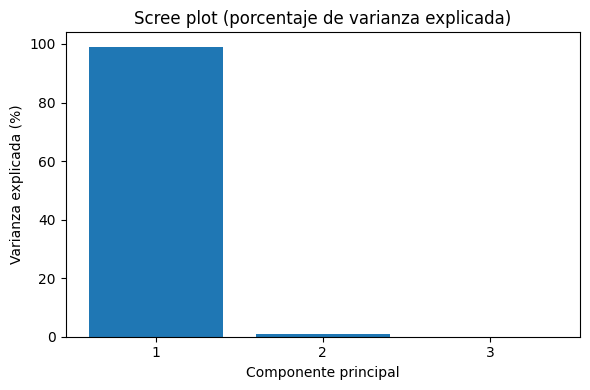

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(range(1, p+1), explained_variance_ratio*100, color='C0')
plt.xticks(range(1, p+1))
plt.xlabel('Componente principal')
plt.ylabel('Varianza explicada (%)')
plt.title('Scree plot (porcentaje de varianza explicada)')
plt.tight_layout()
plt.show()

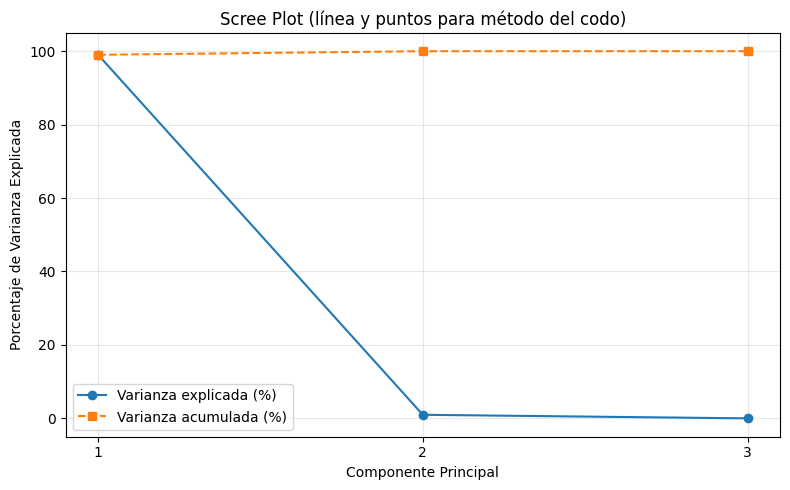

In [ ]:
# Convertir a porcentaje de varianza explicada acumulada
cumulative_var = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8,5))

# Gráfico de línea + puntos
plt.plot(range(1, len(explained_variance_ratio)+1),
         explained_variance_ratio*100,
         marker='o', linestyle='-', color='C0', label='Varianza explicada (%)')

plt.plot(range(1, len(cumulative_var)+1),
         cumulative_var*100,
         marker='s', linestyle='--', color='C1', label='Varianza acumulada (%)')

# Estilo
plt.xticks(range(1, len(explained_variance_ratio)+1))
plt.xlabel("Componente Principal")
plt.ylabel("Porcentaje de Varianza Explicada")
plt.title("Scree Plot (línea y puntos para método del codo)")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

### Interpretación práctica
- El primer componente (PC1) captura la dirección con mayor varianza combinando petal_length y petal_width.
- La variable noise es aleatoria y no debe contribuir significativamente a los primeros PCs (sus cargas/autovector deberían ser pequeñas).
- En la gráfica 3D con Plotly verás que las especies se separan bien en la proyección petal_length × petal_width; el eje noise añade dispersión aleatoria sin información de clase.
- En el scatter de Seaborn (PC1 vs PC2) verás cómo la mayor parte de la estructura (separación entre especies) queda en los primeros componentes si petal_length y petal_width son las principales fuentes de varianza.

---

ChatGPT (GPT-5). (2025). Ejemplos de análisis PCA paso a paso con NumPy, Plotly y Seaborn en el dataset Iris. Asistencia interactiva en notebook. OpenAI.
